In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from pprint import pprint
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
school_file = "../Output/SchoolRating.csv"
city_file = "../Output/5_city_data.csv"
#county_file = "../Output/county_data.csv"

school_data = pd.read_csv(school_file)
school_data.head()

,Rank,School,Type,Grades,Address,City,Zip,County,District,Is Charter,Is Magnet,Is Virtual,Is Title I,Year
0,9,Mission San Jose High,"Public, Magnet",12-Sep,41717 Palm Ave.,Fremont,94539,Alameda,Fremont Unified,No,Yes,No,No,2018
1,28,Piedmont High,Public,12-Sep,800 Magnolia Ave.,Piedmont,94611,Alameda,Piedmont City Unified,No,No,No,No,2018
2,47,American High,Public,12-Sep,36300 Fremont Blvd.,Fremont,94536,Alameda,Fremont Unified,No,No,No,No,2018
3,56,Foothill High,Public,12-Sep,4375 Foothill Rd.,Pleasanton,94588,Alameda,Pleasanton Unified,No,No,No,No,2018
4,57,Irvington High,"Public, Magnet",12-Sep,41800 Blacow Rd.,Fremont,94538,Alameda,Fremont Unified,No,Yes,No,No,2018


In [3]:
school_mean_pd = school_data.groupby(['Year','County','City'])


In [4]:
#get the mean raniking of the schools in each city grouping y year and county
school_meanrankpd =  school_mean_pd['Rank'].mean().astype('int64')
school_meanrankpd.head()

Year  County   City         
2013  Alameda  Alameda           480
               Albany            112
               Berkeley         1107
               Castro Valley     453
               Dublin             73
Name: Rank, dtype: int64

In [5]:
school_df1 = pd.DataFrame(school_meanrankpd)
school_df1 = school_df1.reset_index()

In [6]:
#all_city_rank = school_df1.pivot(index="Year", columns="City",values='Rank')
#all_city_rank.plot(kind='bar')

In [7]:
#load the Housing Sales  data of cities from a csv file
city_salesdata = pd.read_csv(city_file)
city_salesdata.head()


,Unnamed: 0,State,County,City,Median Sale Price,Date,Month,Year
0,50,California,"Santa Clara, CA",Santa Clara,465000.0,2/1/2012,2,2012
1,64,California,"Santa Clara, CA",Santa Clara,690000.0,10/1/2013,10,2013
2,80,California,"Oakland, CA",Oakland,610000.0,5/1/2015,5,2015
3,109,California,"Santa Clara, CA",Santa Clara,541000.0,3/1/2012,3,2012
4,193,California,"Oakland, CA",Oakland,499000.0,6/1/2014,6,2014


In [8]:
# merging the Housung data with School Data 
school_housing_df = pd.merge(school_df1, city_salesdata, on=['City','Year'], how='inner')
school_housing_df.head()

,Year,County_x,City,Rank,Unnamed: 0,State,County_y,Median Sale Price,Date,Month
0,2013,Alameda,Fremont,327,9625,California,"Fremont, CA",530000.0,1/1/2013,1
1,2013,Alameda,Fremont,327,9688,California,"Fremont, CA",620000.0,4/1/2013,4
2,2013,Alameda,Fremont,327,9833,California,"Fremont, CA",648000.0,10/1/2013,10
3,2013,Alameda,Fremont,327,13329,California,"Fremont, CA",650000.0,7/1/2013,7
4,2013,Alameda,Fremont,327,16452,California,"Fremont, CA",636000.0,12/1/2013,12


In [9]:
#school_housing_df1 = school_housing_df.groupby(['Year','City','Rank'])
#school_housing_df2 = school_housing_df1['Median Sale Price'].mean().astype('int64')
school_housing_group = school_housing_df.groupby(['Year','City','Rank'])
school_housing_df2 = school_housing_group['Median Sale Price'].mean().astype('int64')

In [10]:

school_housing_df3 = pd.DataFrame(school_housing_df2)
school_housing_df3 = school_housing_df3.reset_index()
school_housing_df3.head()

,Year,City,Rank,Median Sale Price
0,2013,Fremont,327,622750
1,2013,Hayward,1583,379250
2,2013,Oakland,1323,414333
3,2013,San Jose,913,609000
4,2013,Santa Clara,789,664833


/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


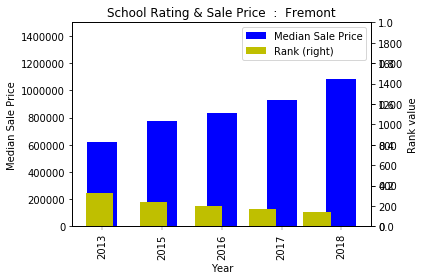

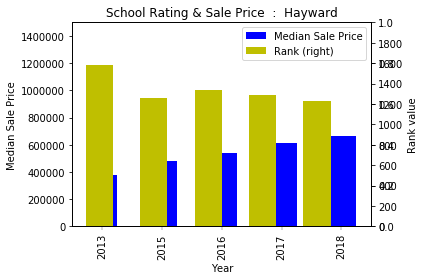

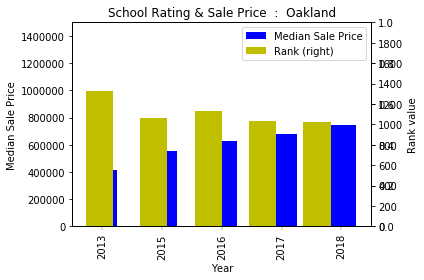

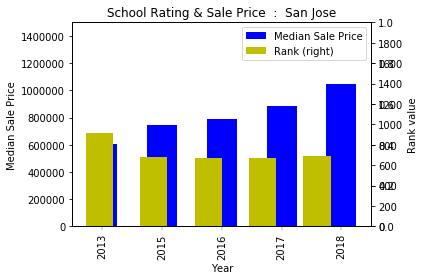

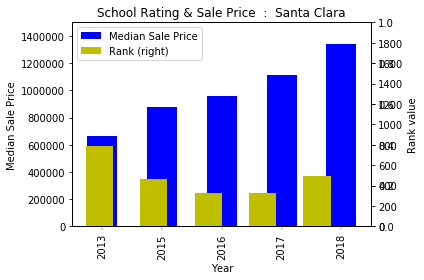

In [11]:
df2 = school_housing_df3.groupby('City')
for key, group in df2:
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1 = group[['Median Sale Price']].plot(kind='bar',color='b')
    ax1.tick_params(axis='x',width=0.3)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Median Sale Price')
    ax1.set_ylim(0, 1500000)
    ax1.set_title(f"School Rating & Sale Price  :  {key}")
    
    ax2 = fig.add_subplot(122)
    ax2 = ax1.twinx()
    ax2 = group[['Rank']].plot(kind='bar', secondary_y=True, ax=ax1, color='y')
    ax2.set_ylabel('Rank value')
    ax2.set_ylim(0, 2000)
    plt.yticks(np.arange(0,2000,200))
    plt.xticks(np.arange(6), group['Year'])
    plt.tight_layout()
    fig.show()
    filename = (f"../Output/{key}SchoolRating.png" )
    plt.savefig(filename)
    plt.close(fig)

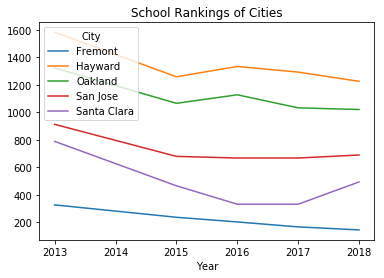

In [12]:
city_rank_df = school_housing_df3.pivot(index="Year", columns="City",values='Rank')
city_rank_df.plot(kind='line', title = "School Rankings of Cities")
plt.savefig("../Output/AllCityRank.png")

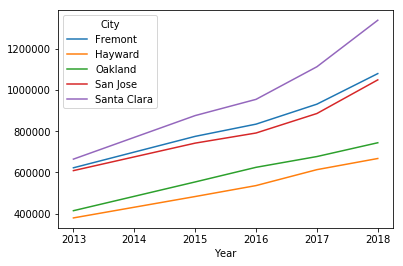

In [13]:
city_rank_df = school_housing_df3.pivot(index="Year", columns="City",values='Median Sale Price')
city_rank_df.plot()
plt.savefig("../Output/AllCityPrice.png")